# Defining the critical water flow for Blois station based on the Gien Station

In this notebook the critical discharge for Blois station is calculated based on the know critical flow at Gien. This calculation is done based on monthly data, as this was the only data available for Gien.

### 1. Importing general python modules

In [1]:
# general python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import numpy as np
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import geopandas as gpd
import pandas as pd
import seaborn as sns

### 2. Loading discharge data

In [2]:
# Load Blois discharge
eSTREAMS_data = pd.read_csv(
    "FR003882_streamflow_m3s.csv", 
    index_col='date', 
    parse_dates=True
)
blois_data = eSTREAMS_data.resample('ME').mean()

# Load Gien discharge
gien_data = pd.read_csv(
    "6123500_Q_Month.txt", 
    encoding='ISO-8859-1',
    sep=';',
    usecols=['YYYY-MM-DD',' Original'],
    index_col='YYYY-MM-DD',
    parse_dates=True,
)

# Merge the two datasets
hydro_data = pd.concat([blois_data.reindex(gien_data.index, method='ffill'), gien_data], axis=1)
hydro_data = hydro_data.rename(columns={"FR003882": "Blois", " Original": "Gien"})

<Axes: xlabel='YYYY-MM-DD'>

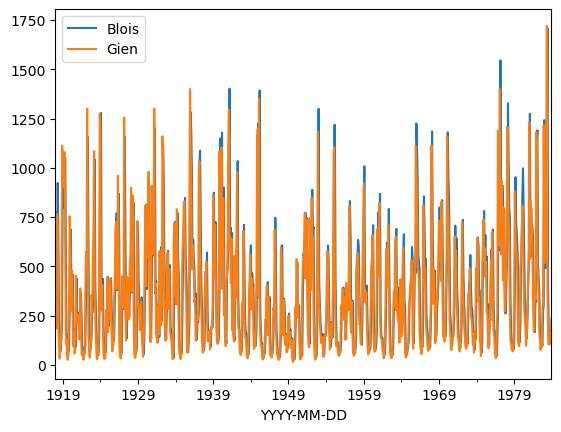

In [3]:
hydro_data.plot()

### 3. Create a Qcrit recalculator

This algorithm checks how many times the discharges has fallen below the critical flow for Gien, and checks under which critical flow the blois discharge falls below the same amount of times. The function return this new critical discharge for Blois.

In [4]:
def crit_discharge_recalculator(Q_data_initial, Qcrit_initial, Q_data_recalc, Qstart_check):
    initial_low_flow_count = (Q_data_initial < Qcrit_initial).sum()

    i = Qstart_check
    while i > 0:
        recalc_low_flow_count = (Q_data_recalc < i).sum()
        if recalc_low_flow_count <= initial_low_flow_count:
            break

        i -= 0.1

    recalc_Qcrit = i
    return recalc_Qcrit

### 4. Results

In [5]:
Blois_Qcrit = crit_discharge_recalculator(hydro_data['Gien'], 50, hydro_data['Blois'], 100)

print(f"The new critical discharge for Blois is: {Blois_Qcrit:.2f} m3/s")

The new critical discharge for Blois is: 66.50 m3/s
